In [ ]:
#                                                   ------------------Bikes Sales Data----------------------

In [3]:
# Importing some python libraries for cleaning,analysing and representing the data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
# read data by using pd.read_excel
df = pd.read_excel(r"C:\Users\HP\Desktop\uncleaned bike sales data.xlsx")

In [6]:
# first five rows
df.head()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590


In [9]:
# remove spaces in columns.
df.columns = df.columns.str.strip()
df.columns

Index(['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', 'Unit_Cost',
       'Unit_Price', 'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [10]:
# copy dataframe
tem_df = df.copy()

In [12]:
#Scanning data for nan,null or duplicated values.
tem_df.isnull().sum()

Sales_Order #          0
Date                   0
Day                    1
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    1
Order_Quantity         1
Unit_Cost              0
Unit_Price             0
Profit                 0
Cost                   0
Revenue                0
dtype: int64

In [19]:
format(tem_df.isnull().sum().sum())

'4'

In [15]:
tem_df.duplicated().sum()

0

In [20]:
tem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales_Order #        89 non-null     int64         
 1   Date                 89 non-null     datetime64[ns]
 2   Day                  88 non-null     float64       
 3   Month                89 non-null     object        
 4   Year                 89 non-null     int64         
 5   Customer_Age         89 non-null     int64         
 6   Age_Group            88 non-null     object        
 7   Customer_Gender      89 non-null     object        
 8   Country              89 non-null     object        
 9   State                89 non-null     object        
 10  Product_Category     89 non-null     object        
 11  Sub_Category         89 non-null     object        
 12  Product_Description  88 non-null     object        
 13  Order_Quantity       88 non-null     

In [33]:
#Look for nan value rows now to fill the data accordingly.
tem_df[tem_df.isna().any(axis = 1)]

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
10,261704,2021-12-05,NaN,December,2021,42,Adults (35-64),M,Germany,Nordrhein-Westfalen,Bikes,Mountain Bikes,"Mountain-200 Black, 38",4.0,1252,2295,4172,5008,9180
15,261709,2021-12-06,6.0,December,2021,36,NaN,M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295
21,261715,2021-12-08,8.0,December,2021,39,Adults (35-64),F,United States,Oregon,Bikes,Mountain Bikes,NaN,2.0,1252,2295,2086,2504,4590
22,261716,2021-12-08,8.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",NaN,295,540,245,0,0


In [39]:
# Will fill the "Day" column nan value with "5" based upon its "Date" column.
tem_df["Day"]=tem_df["Day"].fillna(5)

In [40]:
tem_df[tem_df.isna().any(axis = 1)]

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
15,261709,2021-12-06,6.0,December,2021,36,NaN,M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295
21,261715,2021-12-08,8.0,December,2021,39,Adults (35-64),F,United States,Oregon,Bikes,Mountain Bikes,NaN,2.0,1252,2295,2086,2504,4590
22,261716,2021-12-08,8.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",NaN,295,540,245,0,0


In [41]:
# Will fill the "Age_Group" column nan value with "Adults (35-64)" based upon its "Customer_Age" column.
tem_df["Age_Group"]=tem_df["Age_Group"].fillna("Adults (35-64)")

In [42]:
tem_df[tem_df.isna().any(axis = 1)]

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
21,261715,2021-12-08,8.0,December,2021,39,Adults (35-64),F,United States,Oregon,Bikes,Mountain Bikes,NaN,2.0,1252,2295,2086,2504,4590
22,261716,2021-12-08,8.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",NaN,295,540,245,0,0


In [47]:
# Will fill the "Product_Description" column nan value with "Mountain-200 Black, 38" based upon its "State" & "Unit_Cost" columns.
tem_df[tem_df["State"]=="Oregon"]
tem_df["Product_Description"] = tem_df["Product_Description"].fillna("Mountain-200 Black, 38")

In [48]:
tem_df[tem_df.isna().any(axis = 1)]

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
22,261716,2021-12-08,8.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",NaN,295,540,245,0,0


In [49]:
#Will fill the "Order Quantity" nan value with "1" as based upon the data "Profit" = ("Unit_Price"-"Unit_Cost")*"Order_Quantity".
tem_df["Order_Quantity"]=tem_df["Order_Quantity"].fillna(1)

In [52]:
tem_df.isnull().sum().sum()

0

In [132]:
# split "Age_Group" column to extract "Age_Range" and only "Age Group".
tem_df["Age_Range"] = tem_df["Age_Group"].str.split("(").str.get(1).astype(str)
tem_df["Age_Range"] = tem_df["Age_Range"].str.replace(")","")

In [162]:
tem_df.sample(2)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Age_Range,Model_Name,Colour,Size
56,261750,2021-12-18,18,December,2021,38,Adults,F,Germany,Nordrhein-Westfalen,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",4,1266,2320,4216,5064,9280,35-64,Mountain-200,Silver,46
26,261720,2021-12-10,10,December,2021,40,Adults,M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 42",2,1252,2295,2086,2504,4590,35-64,Mountain-200,Black,42


In [163]:
tem_df["Age_Group"] = tem_df["Age_Group"].str.split("(").str.get(0)
tem_df.sample(3)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Age_Range,Model_Name,Colour,Size
34,261728,2021-12-11,11,December,2021,37,Adults,M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",1,420,769,349,420,769,35-64,Mountain-400-W,Silver,46
11,261705,2021-12-05,5,December,2021,35,Adults,F,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,1054,1266,2320,35-64,Mountain-200,Silver,38
52,261746,2021-12-17,17,December,2021,37,Adults,F,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",2,1266,2320,2108,2532,4640,35-64,Mountain-200,Silver,38


In [164]:
#Splitting the "Product_Description" column based upon ("Model_Name","Colour" & "Size_Centimeter") for better understanding.
tem_df[["Model_Name","Colour","Size"]] = tem_df["Product_Description"].str.split(" ",expand = True)
tem_df["Colour"]=tem_df["Colour"].str.replace(",","")
tem_df.sample(2)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Age_Range,Model_Name,Colour,Size
60,261754,2021-12-18,18,December,2021,26,Young Adults,M,France,Paris,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,1043,1252,2295,25-34,Mountain-200,Black,46
79,261773,2021-12-22,22,December,2021,30,Young Adults,F,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",3,1266,2320,3162,3798,6960,25-34,Mountain-200,Silver,38


In [81]:
#Display all columns
pd.set_option("display.max_columns",None)

In [165]:
tem_df.sample()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Age_Range,Model_Name,Colour,Size
37,261731,2021-12-12,12,December,2021,37,Adults,M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",4,420,769,1396,1680,3076,35-64,Mountain-400-W,Silver,46


In [166]:
tem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales_Order #        89 non-null     int64         
 1   Date                 89 non-null     datetime64[ns]
 2   Day                  89 non-null     int32         
 3   Month                89 non-null     category      
 4   Year                 89 non-null     int64         
 5   Customer_Age         89 non-null     int64         
 6   Age_Group            89 non-null     object        
 7   Customer_Gender      89 non-null     object        
 8   Country              89 non-null     object        
 9   State                89 non-null     object        
 10  Product_Category     89 non-null     category      
 11  Sub_Category         89 non-null     category      
 12  Product_Description  89 non-null     object        
 13  Order_Quantity       89 non-null     

In [ ]:
# Changing Dtype of some columns based upon the data it contain
    #a) Changing Dtype of ("Day","Order_Quantity","Size") from float and object to "Integers"

In [89]:
tem_df[["Day","Order_Quantity","Size"]]=tem_df[["Day","Order_Quantity","Size"]].astype(int)

In [167]:
tem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales_Order #        89 non-null     int64         
 1   Date                 89 non-null     datetime64[ns]
 2   Day                  89 non-null     int32         
 3   Month                89 non-null     category      
 4   Year                 89 non-null     int64         
 5   Customer_Age         89 non-null     int64         
 6   Age_Group            89 non-null     object        
 7   Customer_Gender      89 non-null     object        
 8   Country              89 non-null     object        
 9   State                89 non-null     object        
 10  Product_Category     89 non-null     category      
 11  Sub_Category         89 non-null     category      
 12  Product_Description  89 non-null     object        
 13  Order_Quantity       89 non-null     

In [ ]:
    #b) Changing Dtype of ("Month","Product_Category","Sub_Category","Age_Range","Model_Name","Colour") from object to "Category".

In [92]:
tem_df[["Month","Product_Category","Sub_Category","Age_Range","Model_Name","Colour"]]=tem_df[["Month","Product_Category","Sub_Category","Age_Range","Model_Name","Colour"]].astype("category")

In [93]:
tem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales_Order #        89 non-null     int64         
 1   Date                 89 non-null     datetime64[ns]
 2   Day                  89 non-null     int32         
 3   Month                89 non-null     category      
 4   Year                 89 non-null     int64         
 5   Customer_Age         89 non-null     int64         
 6   Age_Group            89 non-null     object        
 7   Customer_Gender      89 non-null     object        
 8   Country              89 non-null     object        
 9   State                89 non-null     object        
 10  Product_Category     89 non-null     category      
 11  Sub_Category         89 non-null     category      
 12  Product_Description  89 non-null     object        
 13  Order_Quantity       89 non-null     

In [168]:
#Looking for incorrect data
tem_df.columns = tem_df.columns.tolist()
for i in tem_df.columns:
    print(i,tem_df[i].unique())


Sales_Order # [261695 261697 261698 261699 261700 261701 261702 261703 261704 261705
 261706 261707 261708 261709 261710 261711 261712 261713 261714 261715
 261716 261717 261718 261719 261720 261721 261722 261723 261724 261725
 261726 261727 261728 261729 261730 261731 261732 261733 261734 261735
 261736 261737 261738 261739 261740 261741 261742 261743 261744 261745
 261746 261747 261748 261749 261750 261751 261752 261753 261754 261755
 261756 261757 261758 261759 261760 261761 261762 261763 261764 261765
 261766 261767 261768 261769 261770 261771 261772 261773 261774 261775
 261776 261777 261778 261779 261780 261781 261782]
Date <DatetimeArray>
['2021-12-01 00:00:00', '2021-12-02 00:00:00', '2021-12-03 00:00:00',
 '2021-12-04 00:00:00', '2021-12-05 00:00:00', '2021-12-06 00:00:00',
 '2021-12-07 00:00:00', '2021-12-08 00:00:00', '2021-12-09 00:00:00',
 '2021-12-10 00:00:00', '2021-12-11 00:00:00', '2021-12-12 00:00:00',
 '2021-12-13 00:00:00', '2021-12-14 00:00:00', '2021-12-15 00:00:0

In [106]:
#Replacing incorrect data.
    #a) Replace "Decmber" with December in "Month Column".
tem_df["Month"] = tem_df["Month"].replace("Decmber","December")

In [109]:
     #b) Replace "Seine (Paris)" with "Paris" in "State" Column.
tem_df["State"]=tem_df["State"].replace("Seine (Paris)","Paris")

In [172]:
    #c) Replacing value 0 with correct value in columns ("Unit_Cost","Unit_Price","Cost","Revenue").

In [140]:
        #c.1)using the formula ((Unit_Price-Unit_Cost)*Order_Quantity = Profit) for replacing 0 values in "Unit_Cost" & "Unit_Price" with correct values.
tem_df["Unit_Cost"]=tem_df["Unit_Cost"].replace(0,1252)
tem_df["Unit_Price"]=tem_df["Unit_Price"].replace(0,769)
tem_df[(tem_df["Unit_Cost"] == 0) | (tem_df["Unit_Price"] == 0) | (tem_df["Cost"] == 0) | (tem_df["Revenue"] == 0) ]        

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Age_Range,Model_Name,Colour,Size
4,261699,2021-12-03,3,December,2021,37,Adults,F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,0,4590,Adults,Mountain-200,Black,46
8,261702,2021-12-04,4,December,2021,31,Young Adults,F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",4,420,769,1396,1680,0,Young Adults,Mountain-400-W,Silver,42
22,261716,2021-12-08,8,December,2021,35,Adults,F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",1,295,540,245,0,0,Adults,Mountain-500,Black,42


In [142]:
        #c.2)Using the formula(Unit_Cost*Order_Quantity = Cost) replacing 0 values in "Cost" with correct values.
tem_df["Cost"]=tem_df["Unit_Cost"]*tem_df["Order_Quantity"]
tem_df[(tem_df["Unit_Cost"] == 0) | (tem_df["Unit_Price"] == 0) | (tem_df["Cost"] == 0) | (tem_df["Revenue"] == 0) ]   

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Age_Range,Model_Name,Colour,Size
8,261702,2021-12-04,4,December,2021,31,Young Adults,F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",4,420,769,1396,1680,0,Young Adults,Mountain-400-W,Silver,42
22,261716,2021-12-08,8,December,2021,35,Adults,F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",1,295,540,245,295,0,Adults,Mountain-500,Black,42


In [144]:
        #c.3)Using the formula(Profit+Cost = Revenue) replacing 0 values in "Revenue" with correct values.
tem_df["Revenue"]=tem_df["Profit"]+tem_df["Cost"]
tem_df[(tem_df["Unit_Cost"] == 0) | (tem_df["Unit_Price"] == 0) | (tem_df["Cost"] == 0) | (tem_df["Revenue"] == 0) ] 

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Age_Range,Model_Name,Colour,Size


In [215]:
#Checking the values correctly entered or not.
tem_df.loc[4,"Unit_Cost"]

1252

In [216]:
tem_df.loc[8,"Unit_Price"]

769

In [222]:
tem_df.loc[22]

Sales_Order #                          261716
Date                      2021-12-08 00:00:00
Day                                         8
Month                                December
Year                                     2021
Customer_Age                               35
Age_Group                              Adults
Customer_Gender                             F
Country                         United States
State                              California
Product_Category                        Bikes
Sub_Category                   Mountain Bikes
Product_Description    Mountain-500 Black, 42
Order_Quantity                              1
Unit_Cost                                 295
Unit_Price                                540
Profit                                    245
Cost                                      295
Revenue                                   540
Age_Range                               35-64
Model_Name                       Mountain-500
Colour                            

In [227]:
for i in tem_df.columns:
    print(i,tem_df[i].unique())

Sales_Order # [261695 261697 261698 261699 261700 261701 261702 261703 261704 261705
 261706 261707 261708 261709 261710 261711 261712 261713 261714 261715
 261716 261717 261718 261719 261720 261721 261722 261723 261724 261725
 261726 261727 261728 261729 261730 261731 261732 261733 261734 261735
 261736 261737 261738 261739 261740 261741 261742 261743 261744 261745
 261746 261747 261748 261749 261750 261751 261752 261753 261754 261755
 261756 261757 261758 261759 261760 261761 261762 261763 261764 261765
 261766 261767 261768 261769 261770 261771 261772 261773 261774 261775
 261776 261777 261778 261779 261780 261781 261782]
Date <DatetimeArray>
['2021-12-01 00:00:00', '2021-12-02 00:00:00', '2021-12-03 00:00:00',
 '2021-12-04 00:00:00', '2021-12-05 00:00:00', '2021-12-06 00:00:00',
 '2021-12-07 00:00:00', '2021-12-08 00:00:00', '2021-12-09 00:00:00',
 '2021-12-10 00:00:00', '2021-12-11 00:00:00', '2021-12-12 00:00:00',
 '2021-12-13 00:00:00', '2021-12-14 00:00:00', '2021-12-15 00:00:0

In [175]:
tem_df.shape

(89, 23)

In [279]:
# Analyze the data based upon their Countries and Total Revenue generated.
state_revenue_sum = tem_df.groupby("Country")["Revenue"].sum()
state_revenue_sum

Country
Australia         111506
Canada             20080
France             46175
Germany            30010
United Kingdom     19972
United States     135784
Name: Revenue, dtype: int64

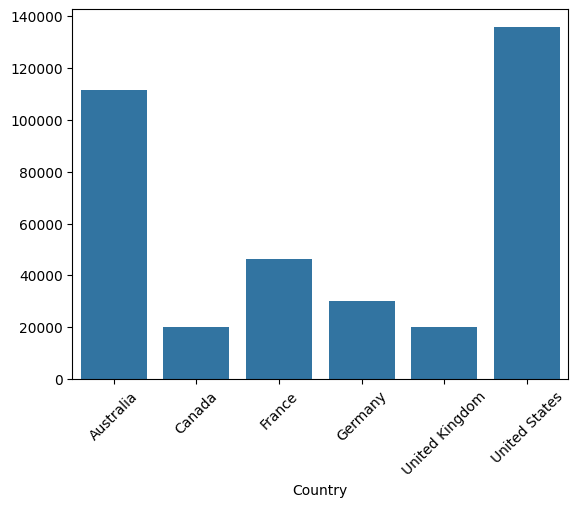

In [323]:
#Using Bar Plot
sns.barplot(x = state_revenue_sum.index,y = state_revenue_sum.values)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Conclusion - From this plot we can see that "United States" produce the highest Revenue followed by"Australia" and then "France" and so on.

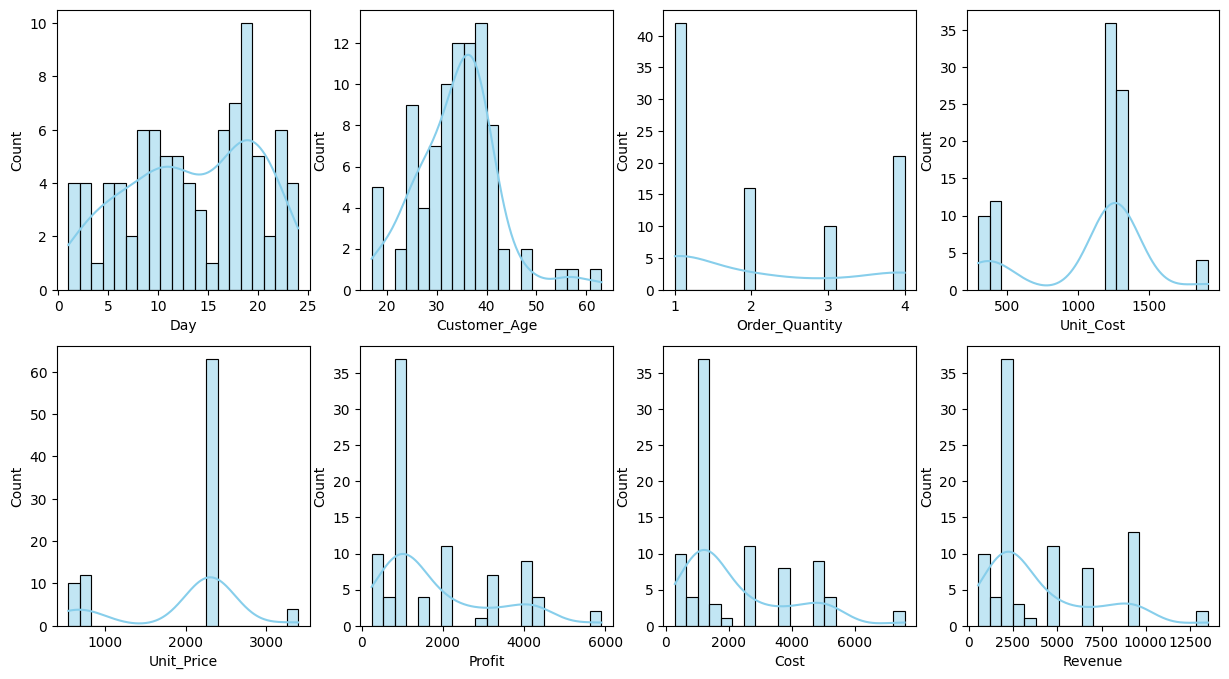

In [285]:
#Analyzing data based upon Histogram Plots of all the numerical columns.
numerical_cols = ["Day","Customer_Age", "Order_Quantity", "Unit_Cost", "Unit_Price", "Profit", "Cost", "Revenue"]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    sns.histplot(data=tem_df, x=col, bins=20, color='skyblue', edgecolor='black', kde=True, ax=axes[i// 4, i % 4])


In [ ]:
#Conclusion: 1) Significant portion of sales occurred between Day 15 and Day 20
            #2) Customer Age is mostly in between 30 to 40.
            #3) Mostly the order quantity is 1 and followed by 4 after that.
            #4) Unit cost ranges between 1200 to 1400 mostly.

In [290]:
#Analyze data based upon all the category column in dataframe.
cat_columns = ["Month","Age_Group","Customer_Gender","Product_Category","Sub_Category","Age_Range","Model_Name","Colour","Size"]

IndexError: index 2 is out of bounds for axis 0 with size 2

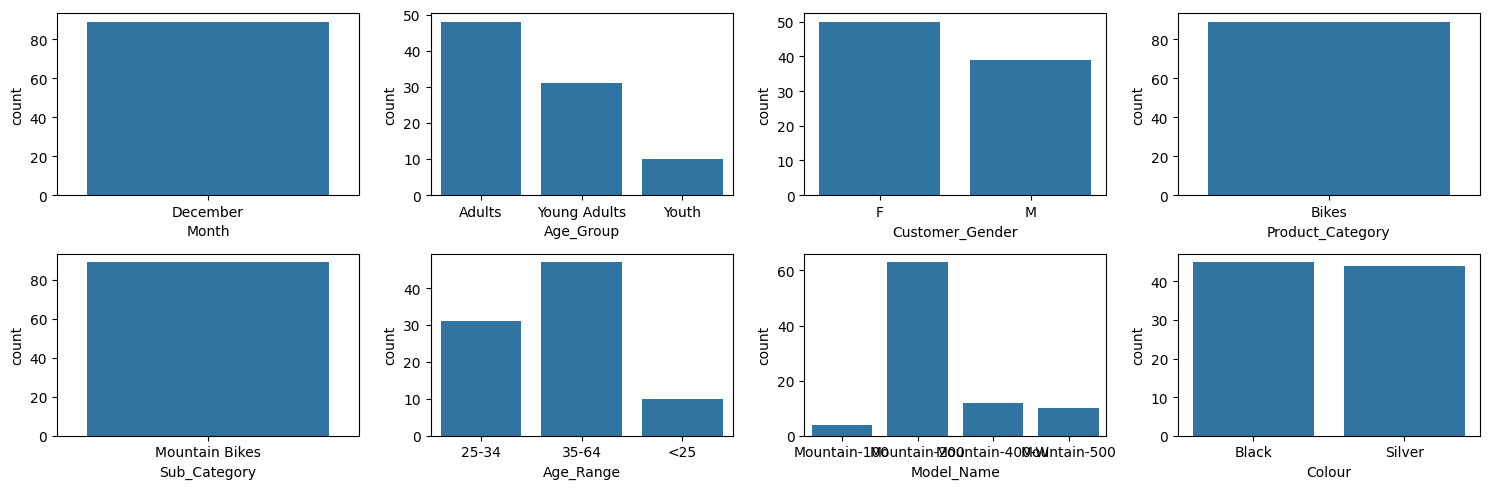

In [319]:
fig, axes = plt.subplots(ncols = 4,nrows= 2,figsize = (15,5))
for i, col in enumerate(cat_columns):
    sns.countplot(data = tem_df,x = col,ax = axes[i//4,i%4])
    plt.tight_layout()

In [ ]:
# Conclusion: 1)There are more adults buyers.
            #2) Females Customers are more as compared to male.
            #3) Both the colours (Black & Silver) are sold almost equally, so there ir no more preffered colour.

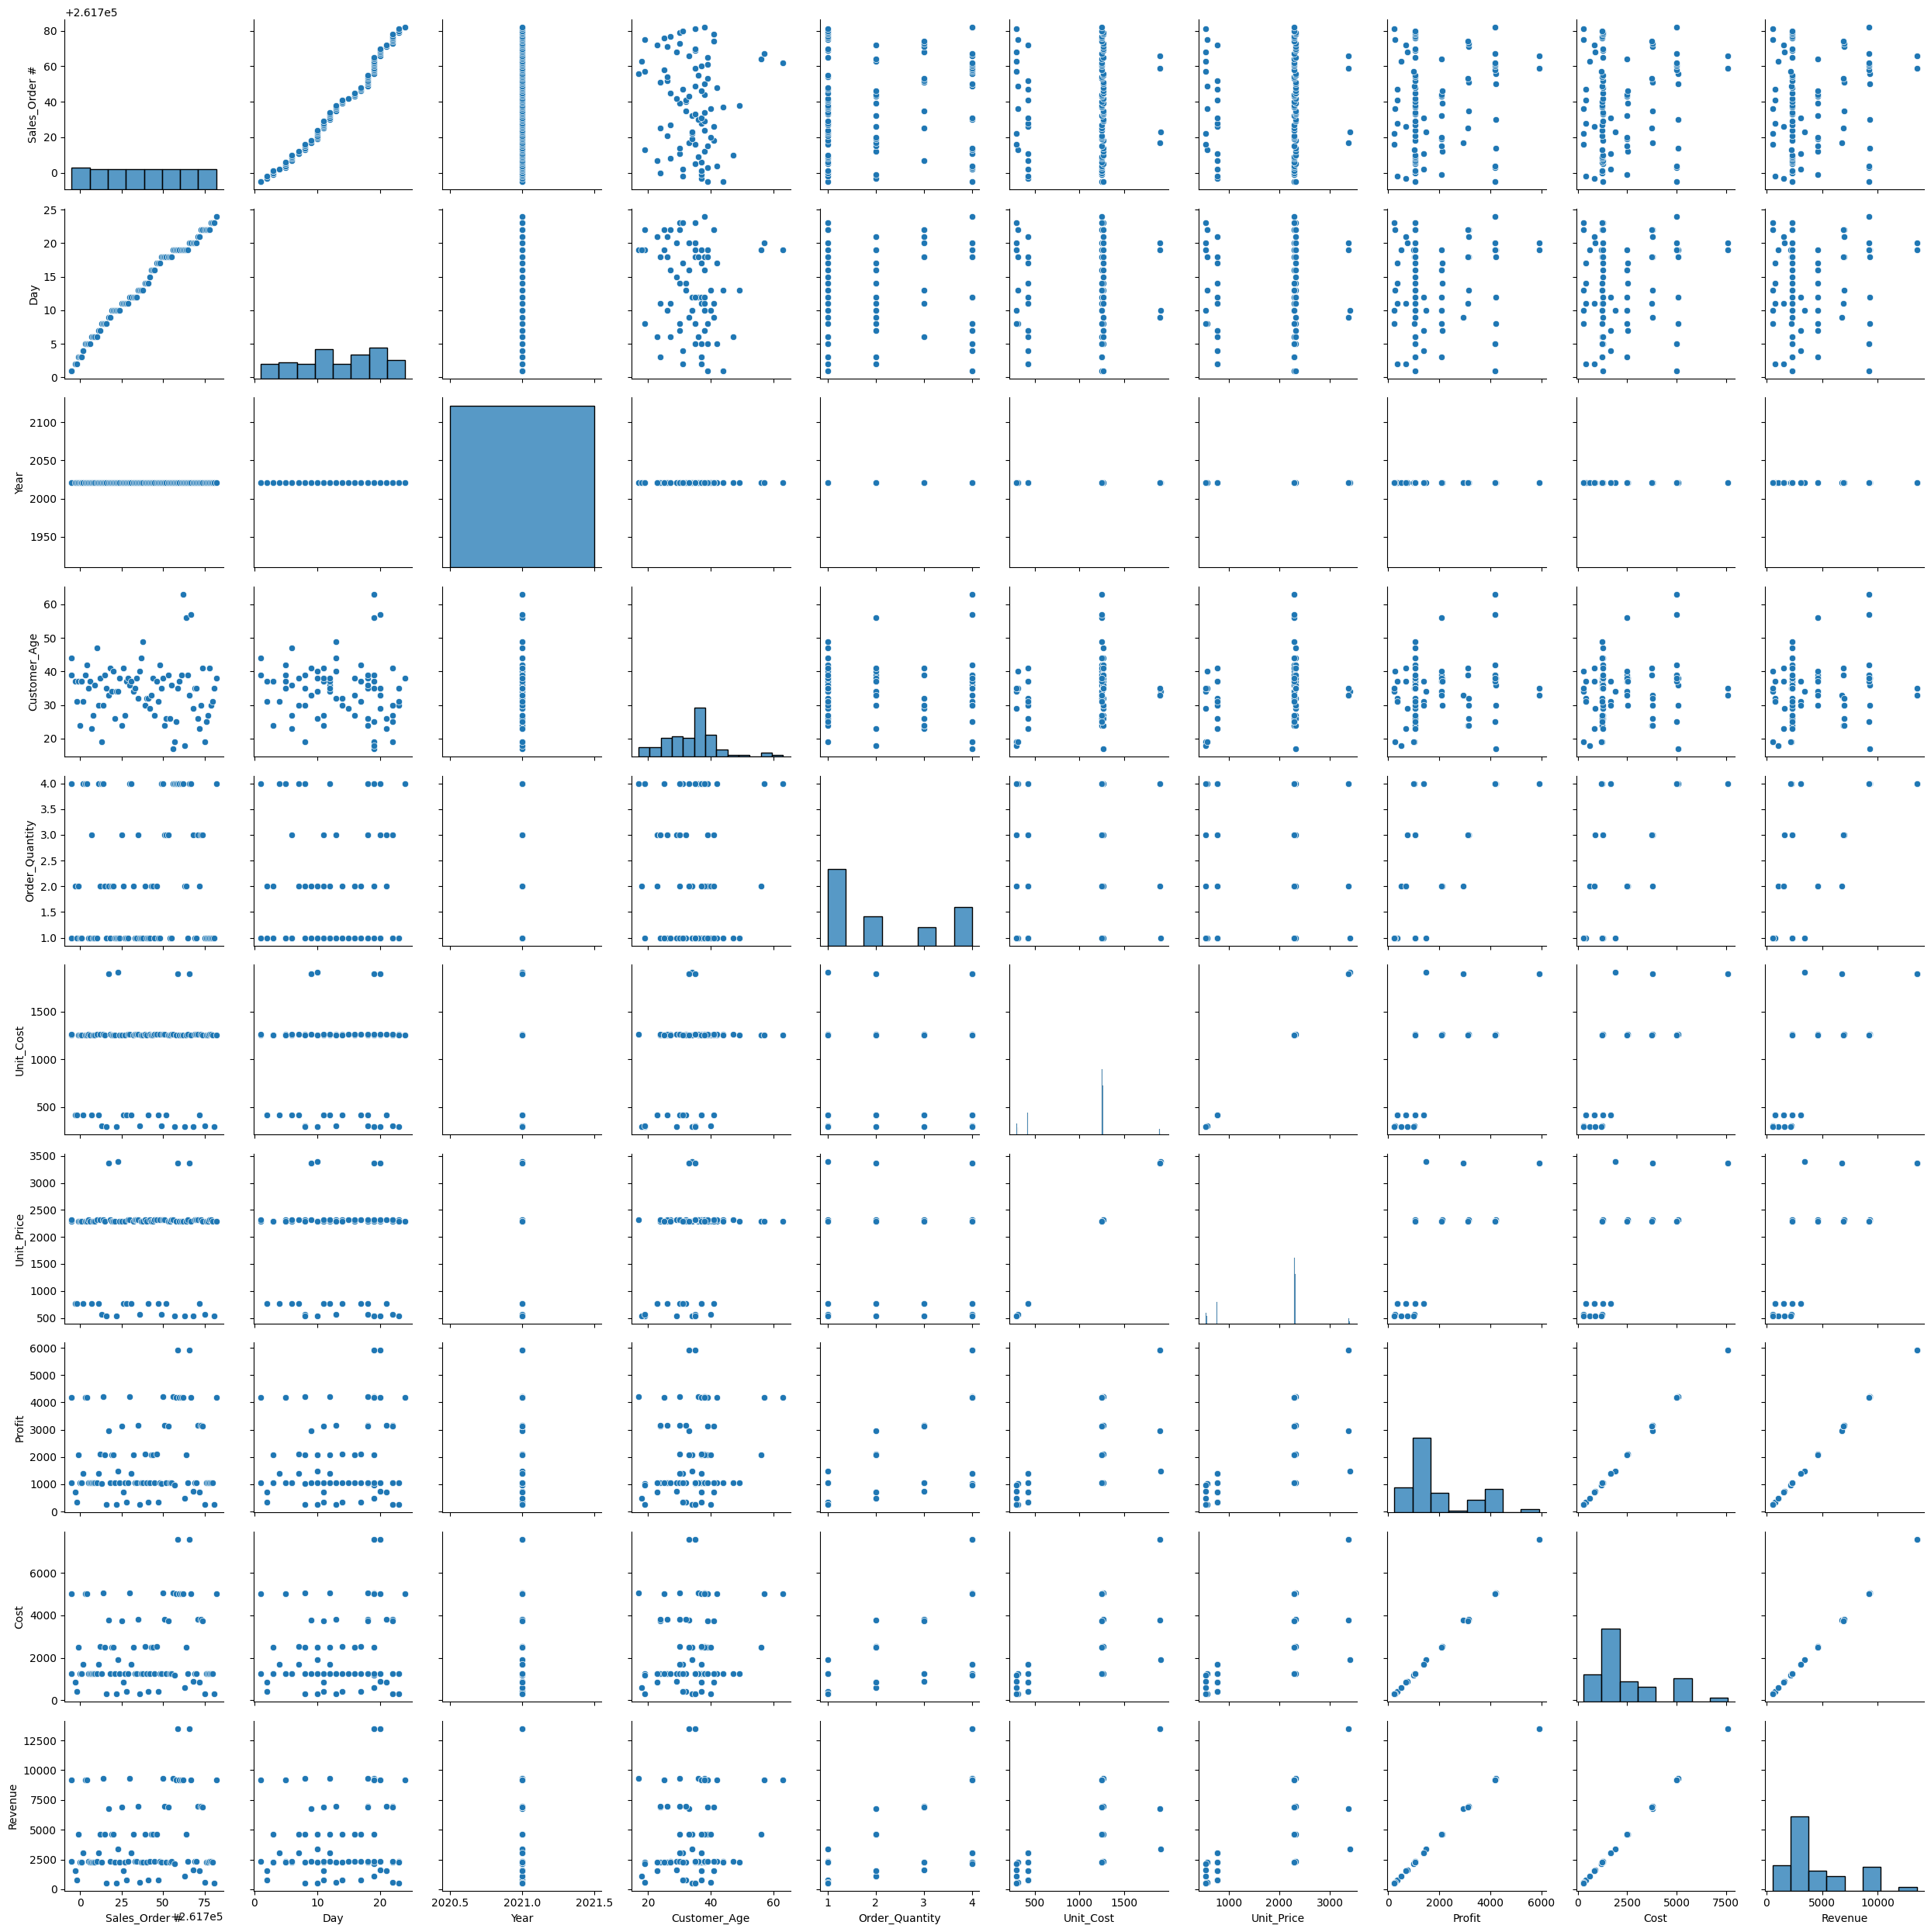

In [286]:
#Analyzing data using pairplot.
sns.pairplot(tem_df)
plt.tight_layout()

In [ ]:
#Conclusion: 1)There is a direct strong relation between "Profit" and "Cost" column as we can see cost is increasing so does the profit.
            #2)There is a direct relation between "Profit" and "Revenue" column as we can see Revenue is increasing so does the profit.

<Axes: xlabel='Profit', ylabel='Cost'>

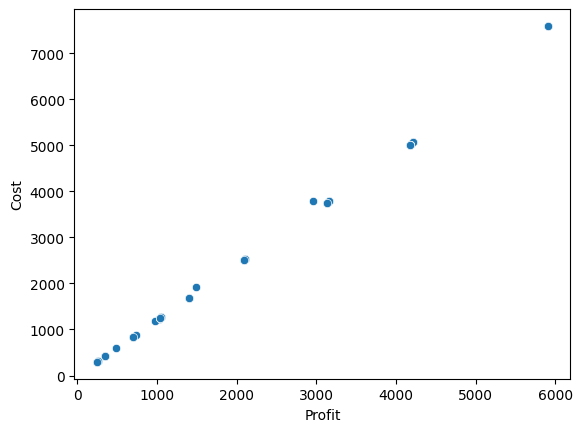

In [324]:
#More clearer representation between the coorelation of Profit and Cost.
sns.scatterplot(data = tem_df,x = "Profit", y = "Cost")